In [0]:
from __future__ import division
import math
import matplotlib.pyplot as plt

import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the data
from sklearn.model_selection import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import time

import warnings
warnings.filterwarnings('ignore')

# Load data from Drive

In [0]:
! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/DB/pins-Real-4.csv
! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/DB/pins-Real-6.csv
! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/DB/pins-Real-8.csv

! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/DB/pins-Impostor-4.csv
! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/DB/pins-Impostor-6.csv
! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/DB/pins-Impostor-8.csv

In [0]:
#Data set csv files
dataPin4 = pd.read_csv('pins-Real-4.csv')
dataPin6 = pd.read_csv('pins-Real-6.csv')
dataPin8 = pd.read_csv('pins-Real-8.csv')
dataPin4Impostor = pd.read_csv('pins-Impostor-4.csv')
dataPin6Impostor  = pd.read_csv('pins-Impostor-6.csv')
dataPin8Impostor  = pd.read_csv('pins-Impostor-8.csv')

In [0]:
listUsers = [1,2,3,4,7,8,11,12,15,16,17,19,20,22,24,25,27,28,33,34,36,37,39,41,42,43]

In [0]:
# lengthDataSet = dataPin4['length']
# lengthDataSet = lengthDataSet[0]
# lengthDataSet

# Cleaning data

Hence we can see there are 2911 rows and 72 columns

In [0]:
#dataless-columns in dataPin are taken away
def dataCleaning(data):
  data = data.dropna(axis = 0, how = 'all')
  return data

data_new =data.dropna(axis=0,how='all')
data_new.head()
data_new.columns

In [0]:
#Create a list to concatenate the users from 0 to 10 -  DataPin
# users = list() 

# for i in listUsers:
#     df_user = clean_dataPin[clean_dataPin['user'] == i]
#     df_user.drop(['user','length'],axis=1, inplace=True)
#     user = df_user.values
#     users.append(user)
    
# len(users)

In [0]:
def listUser(dataset, listUsers, target=1):

  users = list() 
  cleaned_data = dataCleaning(dataset)
  for i in listUsers:

    df_user = cleaned_data[cleaned_data['user'] == i]
    df_user['target'] = target
    df_user.drop(['user','length'],axis=1, inplace=True)
    user = df_user.values
    users.append(user)
      
  return users

In [0]:
listUserPin4 = listUser(dataPin4, listUsers)
listUserPin6 = listUser(dataPin6, listUsers)
listUserPin8 = listUser(dataPin8, listUsers)

listUserPin4Impostors = listUser(dataPin4Impostor, listUsers, target = -1)
listUserPin6Impostors = listUser(dataPin6Impostor, listUsers, target = -1)
listUserPin8Impostors =listUser(dataPin8Impostor, listUsers, target = -1)

In [0]:
#ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [0]:
#Metrics: precision (precision_score), sensitivity (recall_score), 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
def metrics(Ytrain,Yval,y_predict_train, y_predict_valid):
  #print('Getting metrics...')

  accuracyTrain = np.mean(y_predict_train.ravel() == Ytrain.ravel())

  accuracyValid =np.mean(y_predict_valid.ravel() == Yval.ravel()) 
 

  return accuracyTrain, accuracyValid        

## Get X and Y sets


In [0]:
s = 1
data = listUserPin4[s]
Xtrain_original = data[:,0:22]
Ytrain_original = data[:,23]
Ytrain_original = Ytrain_original.astype(int)

In [0]:
s = 1
dataI = listUserPin4Impostors[s]
Xtest_original = dataI[:,0:22]
Ytest_original = dataI[:,23]
Ytest_original=Ytest_original.astype(int)

In [0]:
# Xtrain_original, Xtest_original, Ytrain_original, Ytest_original = train_test_split(X, Y, train_size=20)

# Models

In [0]:
# MODELS
from sklearn.ensemble import IsolationForest
from sklearn import svm

In [0]:
modelIsoForest = IsolationForest()
modelSVM = svm.OneClassSVM()

## Manual Grid Search

In [0]:
from sklearn.model_selection import ParameterGrid

gridSVM = {'nu' : [0.00001, 0.0001, 0.001, 0.01, 0.1], 'gamma' : ['scale', 'auto'], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gridIsoForest = {'n_estimators': list(range(5, 25, 4)), 
                'max_samples': ['auto'], 
                'contamination': [0, 0.5], 
                'max_features': [5,10,15,20,22], 
                'bootstrap': [True,False], 
                'n_jobs': [-1]}

In [0]:
list(ParameterGrid(gridSVM))
len(list(ParameterGrid(gridSVM)))

40

In [0]:
list(ParameterGrid(gridIsoForest))
len(list(ParameterGrid(gridIsoForest)))

100

# GridSearch V1.1

In [0]:
modelsAndGrids = [('modelIsoForest ', modelIsoForest, gridIsoForest), ('modelSVM', modelSVM, gridSVM)]

In [0]:
# Xtrain_original, Xtest_original, Ytrain_original, Ytest_original = train_test_split(X, Y, train_size=20)

In [0]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from numpy import random


In [0]:
def GridSearch(Xtrain_original,Ytrain_original,models):
  # create lists to store final results
  train_score = []
  val_score = []
  std_train= []
  std_val=[]
  best_params = []
  models_results = []

  Folds = 10
  results = list()
  gsAccuracy = 0
  # random.seed(19680801)
  #Data Normalization
  scaler = preprocessing.StandardScaler().fit(Xtrain_original)
  Xtrain_original = scaler.transform(Xtrain_original)
  
  kf = KFold(n_splits=Folds,shuffle=True)
  for m in range(0,len(models)):
    params = []
    meanAccuracyValid = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    meanAccuracyTrain = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    meanStdValid = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    meanStdTrain = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    result = list()
    k=0
    for z in ParameterGrid(models[m][2]):
      params.append(z)
      accuracyTrainFolds = np.zeros((Folds,1))
      accuracyValidFolds = np.zeros((Folds,1))
      stdTrainFolds = np.zeros((Folds,1))
      stdValidFolds = np.zeros((Folds,1))
      j=0
      
      models[m][1].set_params(**z)

      for train, valid in kf.split(Xtrain_original):
        Xtrain = Xtrain_original[train,:]
        Ytrain = Ytrain_original[train]
        Xvalid = Xtrain_original[valid,:]
        Yvalid = Ytrain_original[valid]

        models[m][1].fit(Xtrain)

        y_predict_train =  models[m][1].predict(Xtrain)
        
        #Validation
        y_predict_valid = models[m][1].predict(Xvalid)



        accuracyTrainFolds[j], accuracyValidFolds[j] = metrics(Ytrain,Yvalid,y_predict_train,y_predict_valid )
        
        j+=1

      meanAccuracyTrain[k], meanAccuracyValid[k], meanStdTrain[k], meanStdValid[k] = np.mean(accuracyTrainFolds), np.mean(accuracyValidFolds), np.std(accuracyTrainFolds), np.std(accuracyValidFolds)
      k+=1
    result.append([models[m][0], meanAccuracyValid[np.argmax(meanAccuracyValid)],meanStdValid[np.argmax(meanAccuracyValid)], params[np.argmax(meanAccuracyValid)]])

    results.append(result)

  return results

In [0]:
results = GridSearch(Xtrain_original,Ytrain_original,modelsAndGrids)

In [0]:
IF = results[0]
OC = results[1]
OCP = OC[0]
IFP = IF[0]
IFParams = IFP[3]
SVMParams = OCP[3]

In [0]:
IFParams

{'bootstrap': True,
 'contamination': 0,
 'max_features': 5,
 'max_samples': 'auto',
 'n_estimators': 5,
 'n_jobs': -1}

In [0]:
# IFParams = {'bootstrap': True,
#  'contamination': 0,
#  'max_features': 10,
#  'max_samples': 'auto',
#  'n_estimators': 5,
#  'n_jobs': -1}

In [0]:
SVMParams

{'gamma': 'auto', 'kernel': 'sigmoid', 'nu': 0.1}

In [0]:
columns=["models","mean train Accuracy","CI (+-)", "Best params"]
result0 = pd.DataFrame(results[0],columns=columns)
result1 = pd.DataFrame(results[1],columns=columns)

In [0]:
resultados_finales = result0.append(result1)

In [0]:
resultados_finales

,models,mean train Accuracy,CI (+-),Best params
0,modelIsoForest,[1.0],[0.0],"{'bootstrap': True, 'contamination': 0, 'max_f..."
0,modelSVM,[0.7333333333333333],[0.23804761428476165],"{'gamma': 'auto', 'kernel': 'sigmoid', 'nu': 0.1}"


## Best model evaluation with the test set

In [0]:
def MetricsBestParams(model,X_train,X_test,Y_test):

  #Data Normalization
  scaler = preprocessing.StandardScaler().fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  
  model.fit(X_train)

  y_predicted = model.predict(X_test)

  print('y_predicted', y_predicted)
  print('Y_test', Y_test)

  print('Accuracy: ', accuracy_score(Y_test, y_predicted), '\n')
  report = classification_report(Y_test, y_predicted)
  print("\nclassification report :\n",report )
 
  # Confusion matrix
  cm = confusion_matrix(Y_test, y_predicted)
  # Normalize
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(10,10))
  print(cmn)  
  sns.heatmap(cmn, annot=True, fmt='.2f')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
  plt.show(block=False)
      
  return report

## IsolationForest best parameters

In [0]:
IsolationForest_best_params = IFParams

IsolationForest__best_estimator = modelsAndGrids[0][1].set_params(**IsolationForest_best_params)

y_predicted [-1  1  1  1  1]
Y_test [-1 -1 -1 -1 -1]
Accuracy:  0.2 


classification report :
               precision    recall  f1-score   support

          -1       1.00      0.20      0.33         5
           1       0.00      0.00      0.00         0

    accuracy                           0.20         5
   macro avg       0.50      0.10      0.17         5
weighted avg       1.00      0.20      0.33         5

[[0.2 0.8]
 [nan nan]]


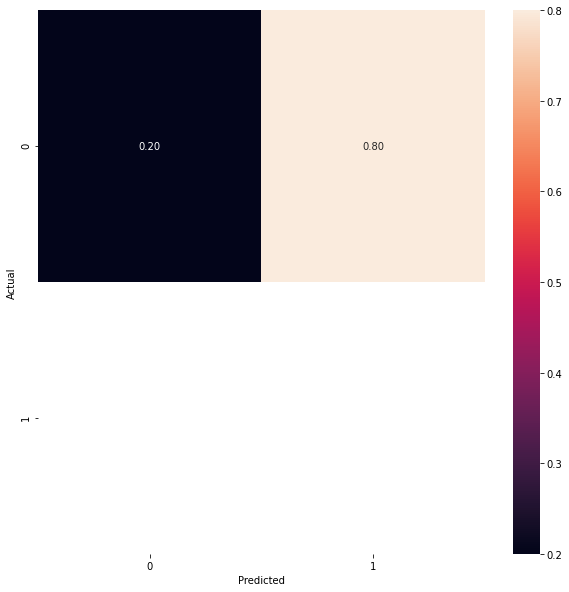

In [0]:
metricsIF = MetricsBestParams(IsolationForest__best_estimator,Xtrain_original,Xtest_original,Ytest_original)

OneClassSVM best parameters

In [0]:
# SVM_best_params = {'gamma': 'scale', 'kernel': 'sigmoid', 'nu': 0.01}
SVM_best_params = SVMParams
SVM__best_estimator = modelsAndGrids[1][1].set_params(**SVM_best_params)

y_predicted [1 1 1 1 1]
Y_test [-1 -1 -1 -1 -1]
Accuracy:  0.0 


classification report :
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

[[ 0.  1.]
 [nan nan]]


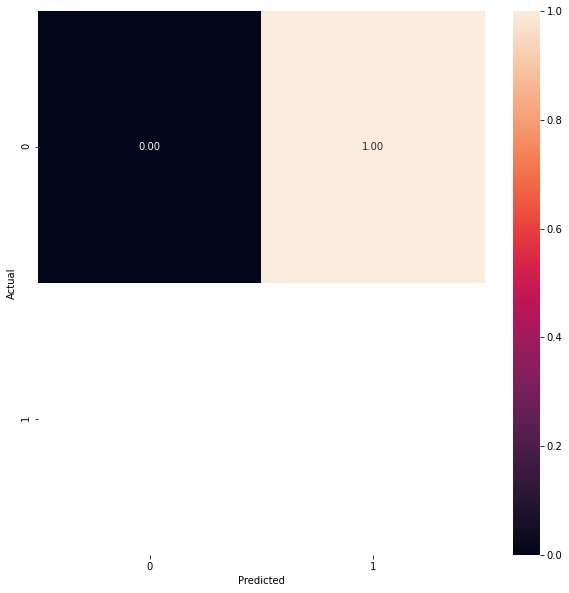

In [0]:
metricsSVM = MetricsBestParams(SVM__best_estimator,Xtrain_original,Xtest_original,Ytest_original)

### Builder model definition (TODO)

In [0]:
def build_model(model, parameters, train_size, X,Y):
  # Xtrain_original, Xtest_original, Ytrain_original, Ytest_original = train_test_split(X, Y, train_size=20)
  # Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=train_size)
  #Data Normalization

  Folds = 10
  accuracyTrainFolds = np.zeros((Folds,1))
  accuracyValidFolds = np.zeros((Folds,1))
  stdTrainFolds = np.zeros((Folds,1))
  stdValidFolds = np.zeros((Folds,1))
  j=0

  for i in range(Folds):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=train_size)

    scaler = preprocessing.StandardScaler().fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)
    model.fit(Xtrain)

    ypred_train = model.predict(Xtrain)

    ypred_valid = model.predict(Xtest)

    # #Validation
    #     y_predict_valid = models[m][1].predict(Xvalid)



    #     accuracyTrainFolds[j], accuracyValidFolds[j] = metrics(Ytrain,Yvalid,y_predict_train,y_predict_valid )

    accuracyTrainFolds[i], accuracyValidFolds[i] = metrics(Ytrain,Ytest,ypred_train,ypred_valid)
  
  accuracyTrain, accuracyValid, stdTrain, stdValid = np.mean(accuracyTrainFolds), np.mean(accuracyValidFolds), np.std(accuracyTrainFolds), np.std(accuracyValidFolds)
  return accuracyTrain, accuracyValid, stdTrain, stdValid


## 3. Learning Curve

In [0]:
def learning_curve(model,best_parameters ,X,Y, suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy'):
    """
    Parameters
    ----------
    suptitle : str
        Chart suptitle
    title: str
        Chart title
    xlabel: str
        Label for the X axis
    ylabel: str
        Label for the y axis
    Returns
    -------
    Plot of learning curves
    """
    
    # create lists to store train and validation scores
    train_score = []
    val_score = []
    std_train= []
    std_val=[]

    # create ten incremental training set sizes
    training_set_sizes = np.linspace(5,24,19,dtype=int).tolist()
    # for each one of those training set sizes
    
    for i in training_set_sizes:
      EfficiencyTrain , EfficiencyVal , stdTrain, stdVal = build_model(model, best_parameters, i, X,Y)

      # store the scores in their respective lists
      train_score.append(EfficiencyTrain)
      val_score.append(EfficiencyVal)
      std_train.append(stdTrain)
      std_val.append(stdVal)

    train_score =np.array(train_score)
    val_score =np.array(val_score)
    std_train =np.array(std_train)
    std_val =np.array(std_val)


    # plot learning curves
    fig, ax = plt.subplots(figsize=(14, 9))
    ax.plot(training_set_sizes, train_score, c='gold')
    ax.plot(training_set_sizes, val_score, c='steelblue')
    
    ax.fill_between(training_set_sizes,train_score+std_train,train_score-std_train,facecolor='gold',alpha=0.5)
    ax.fill_between(training_set_sizes,val_score+std_val,val_score-std_val,facecolor='steelblue',alpha=0.5)

    # format the chart to make it look nice
    fig.suptitle(suptitle, fontweight='bold', fontsize='20')
    ax.set_title(title, size=20)
    ax.set_xlabel(xlabel, size=16)
    ax.set_ylabel(ylabel, size=16)
    ax.legend(['Train set', 'Test set'], fontsize=16)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_ylim(0, 1)

    def percentages(x, pos):
        """The two args are the value and tick position"""
        if x < 1:
            return '{:1.0f}'.format(x*100)
        return '{:1.0f}%'.format(x*100)

    def numbers(x, pos):
        """The two args are the value and tick position"""
        if x >= 1000:
            return '{:1,.0f}'.format(x)
        return '{:1.0f}'.format(x)
    data = {'Train_Size':training_set_sizes, 'mean_train_Accuracy':train_score,'mean_test_Accuracy':val_score,'std_train_Accuracy':std_train,'std_test_Accuracy':std_val}
    df_split_params = pd.DataFrame(data)
    return df_split_params

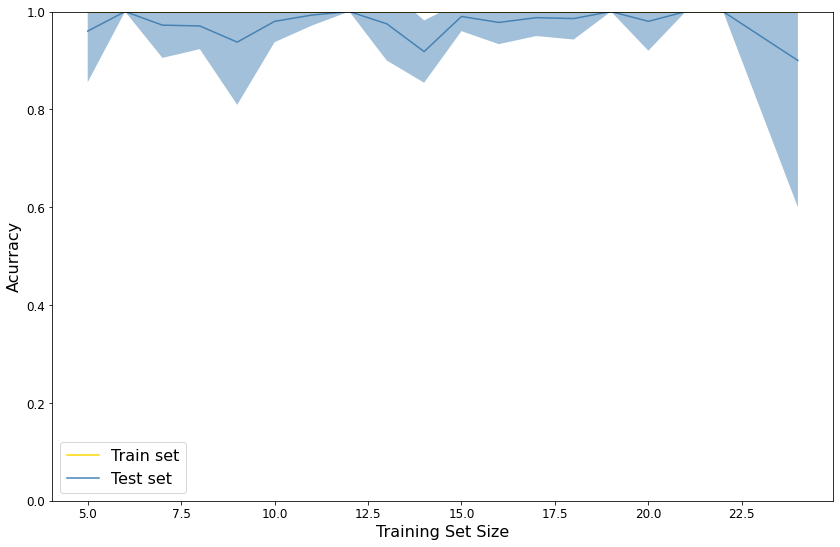

In [0]:
df_split_paramsIF =learning_curve(model=IsolationForest__best_estimator,best_parameters=IsolationForest_best_params, X=Xtrain_original,Y=Ytrain_original)

In [0]:
df_split_paramsIF

,Train_Size,mean_train_Accuracy,mean_test_Accuracy,std_train_Accuracy,std_test_Accuracy
0,5,1.0,0.960000,0.0,0.104403
1,6,1.0,1.000000,0.0,0.000000
2,7,1.0,0.972222,0.0,0.066898
3,8,1.0,0.970588,0.0,0.047425
4,9,1.0,0.937500,0.0,0.128087
5,10,1.0,0.980000,0.0,0.042687
6,11,1.0,0.992857,0.0,0.021429
7,12,1.0,1.000000,0.0,0.000000
8,13,1.0,0.975000,0.0,0.075000
9,14,1.0,0.918182,0.0,0.063636


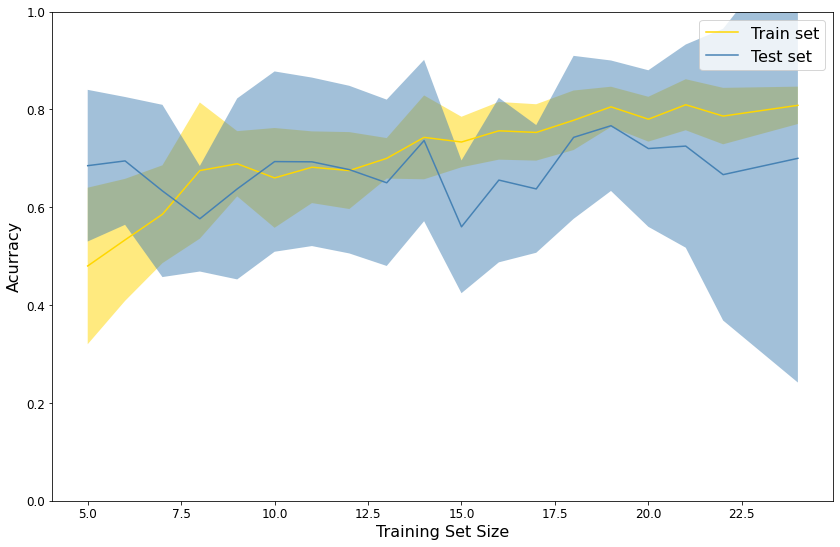

In [0]:
df_split_params =learning_curve(model=SVM__best_estimator,best_parameters=SVM_best_params, X=Xtrain_original,Y=Ytrain_original)

In [0]:
df_split_params

,Train_Size,mean_train_Accuracy,mean_test_Accuracy,std_train_Accuracy,std_test_Accuracy
0,5,0.480000,0.685000,0.160000,0.155000
1,6,0.533333,0.694737,0.124722,0.130628
2,7,0.585714,0.633333,0.100000,0.176033
3,8,0.675000,0.576471,0.139194,0.107825
4,9,0.688889,0.637500,0.066667,0.184983
5,10,0.660000,0.693333,0.101980,0.184270
6,11,0.681818,0.692857,0.073293,0.172171
7,12,0.675000,0.676923,0.078617,0.171316
8,13,0.700000,0.650000,0.041424,0.169967
9,14,0.742857,0.736364,0.085714,0.164894
